### Student Details

Student Name: Feiyang Li

Student ID: 23202564

# Task 2: Probability Theory

## Experiment 1： Estimation of pies and their visualisation(discrete probability)


 Suppose there is a square of side 2 with centre at the origin and draw its incircle, which is a circle with radius 1 and centre at the origin. Calculate pi by casting random points into the square.  
 To calculate the circumference using the random cast method, simply need to  count the number of points that fall inside the circle and the number of points that fall inside the square, and the quotient of the two is the frequency with which the cast points fall inside the circle. Then, calculate the probability that the pitch point falls inside the circle from the geometric probability. By repeating this test a large number of times, the value of the frequency obtained is approximately equal to the probability according to Benulli's law of large numbers. From the geometric probability there is so, thus the approximate value of the circumference of the circle is calculated.  
 In this experiment, a uniform distribution was used to generate random numbers. Specifically, np.random.uniform(-1, 1).

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

+ Generate two series of [-1, 1] random numbers.
+ Label points blue if they are inside a circle; otherwise label them green.
+ Count the number of blue points, calculate the frequency, and thus calculate an approximation of the circumference.

## Manual Calculations

(Provide details of the manual calculations)  
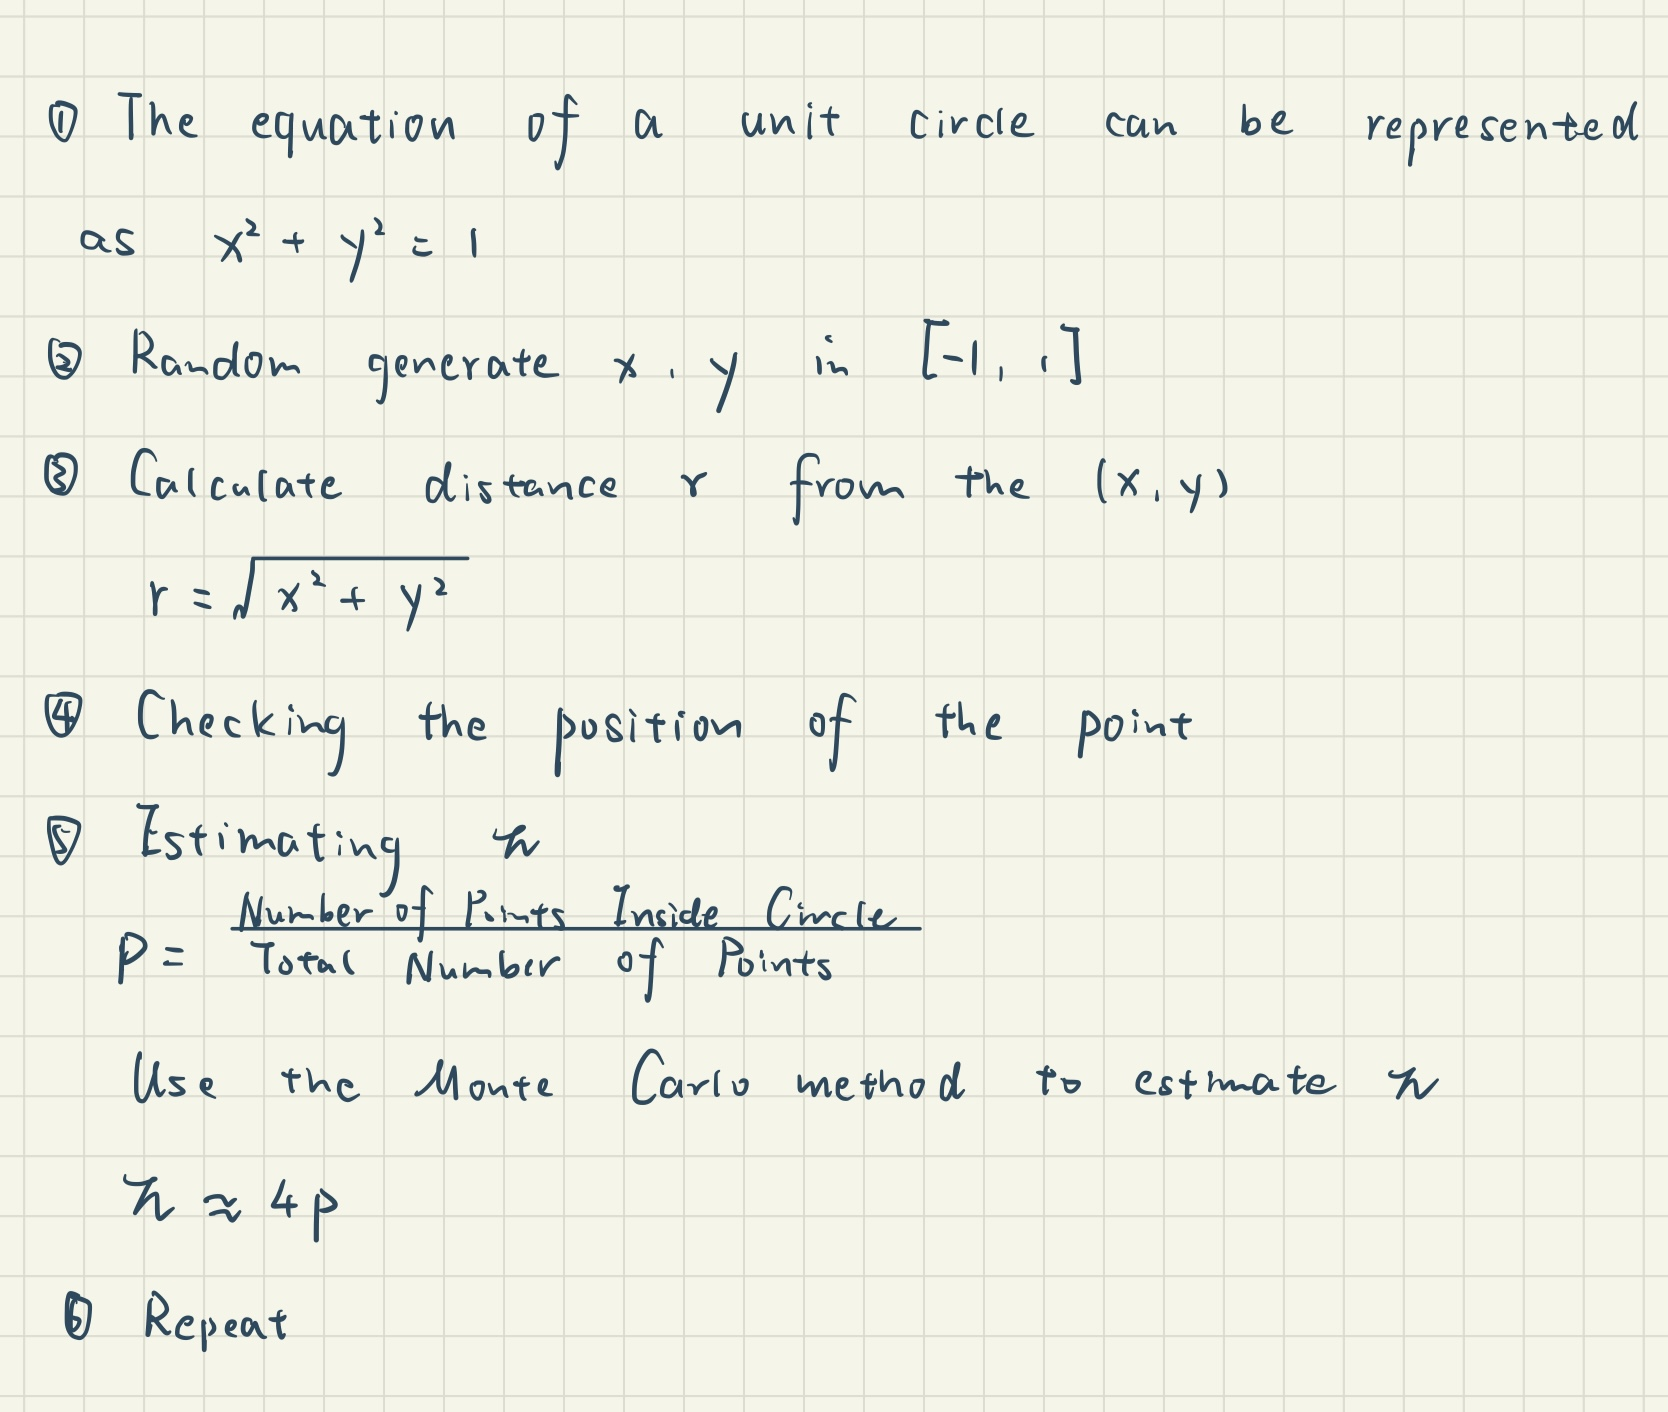

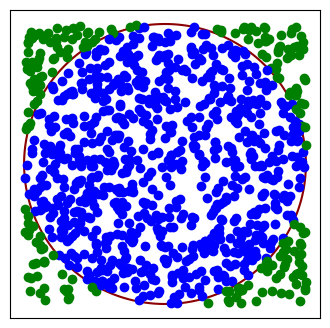

3.128


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Drawing unit circles
theta = np.linspace(0, 2 * np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y, color="darkred")
plt.xticks([])  # Remove scale from x-axis
plt.yticks([])  # Remove scale from y-axis

N = 1000
count = 0
for i in range(1, N + 1):
    x = np.random.uniform(-1, 1)  # Generate N random numbers obeying a uniform distribution on [-1,1]
    y = np.random.uniform(-1, 1)  # Generate N random numbers obeying a uniform distribution on [-1,1]
    if x ** 2 + y ** 2 < 1:
        count += 1
        plt.plot(x, y, 'bo')  # If the point is inside the circle, draw blue
    else:
        plt.plot(x, y, 'go')  # Outside the circle, draw green

p = count / N
plt.show()
pai = 4 * p
print(pai)


## Experiment 2： Calculation of the normal distribution(sequential probability)

The standard capacity of a certain brand of bottled water is 500 ml. Let the capacity of each bottle IS X ml, and it is a random variable, X~N(500, 25), questions are as follows:  
+ Find the probability that a randomly selected bottle will have a capacity greater than 510 ml;
+ Remove a bottle of water at random and find the probability that the absolute value of the difference between its capacity and the standard capacity is within 8 ml;  
+ The probability that the capacity of each bottle is less than C is 0.05, find C

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

+ Calculate the value of the distribution function of the normal distribution using norm.cdf().
  + norm.cdf(x, mu, sigma) are the values of x that require a distribution function, mu is the expectation, and sigma is the standard deviation.
+ Calculated using norm.cdf(510, 500, 5).  
+ calculated using norm.cdf(508, 500, 5) - norm.cdf(5492, 500, 5).  
+ Using norm.ppf(alpha,mu,sigma) calculates the alpha quantile.

## Manual Calculations  
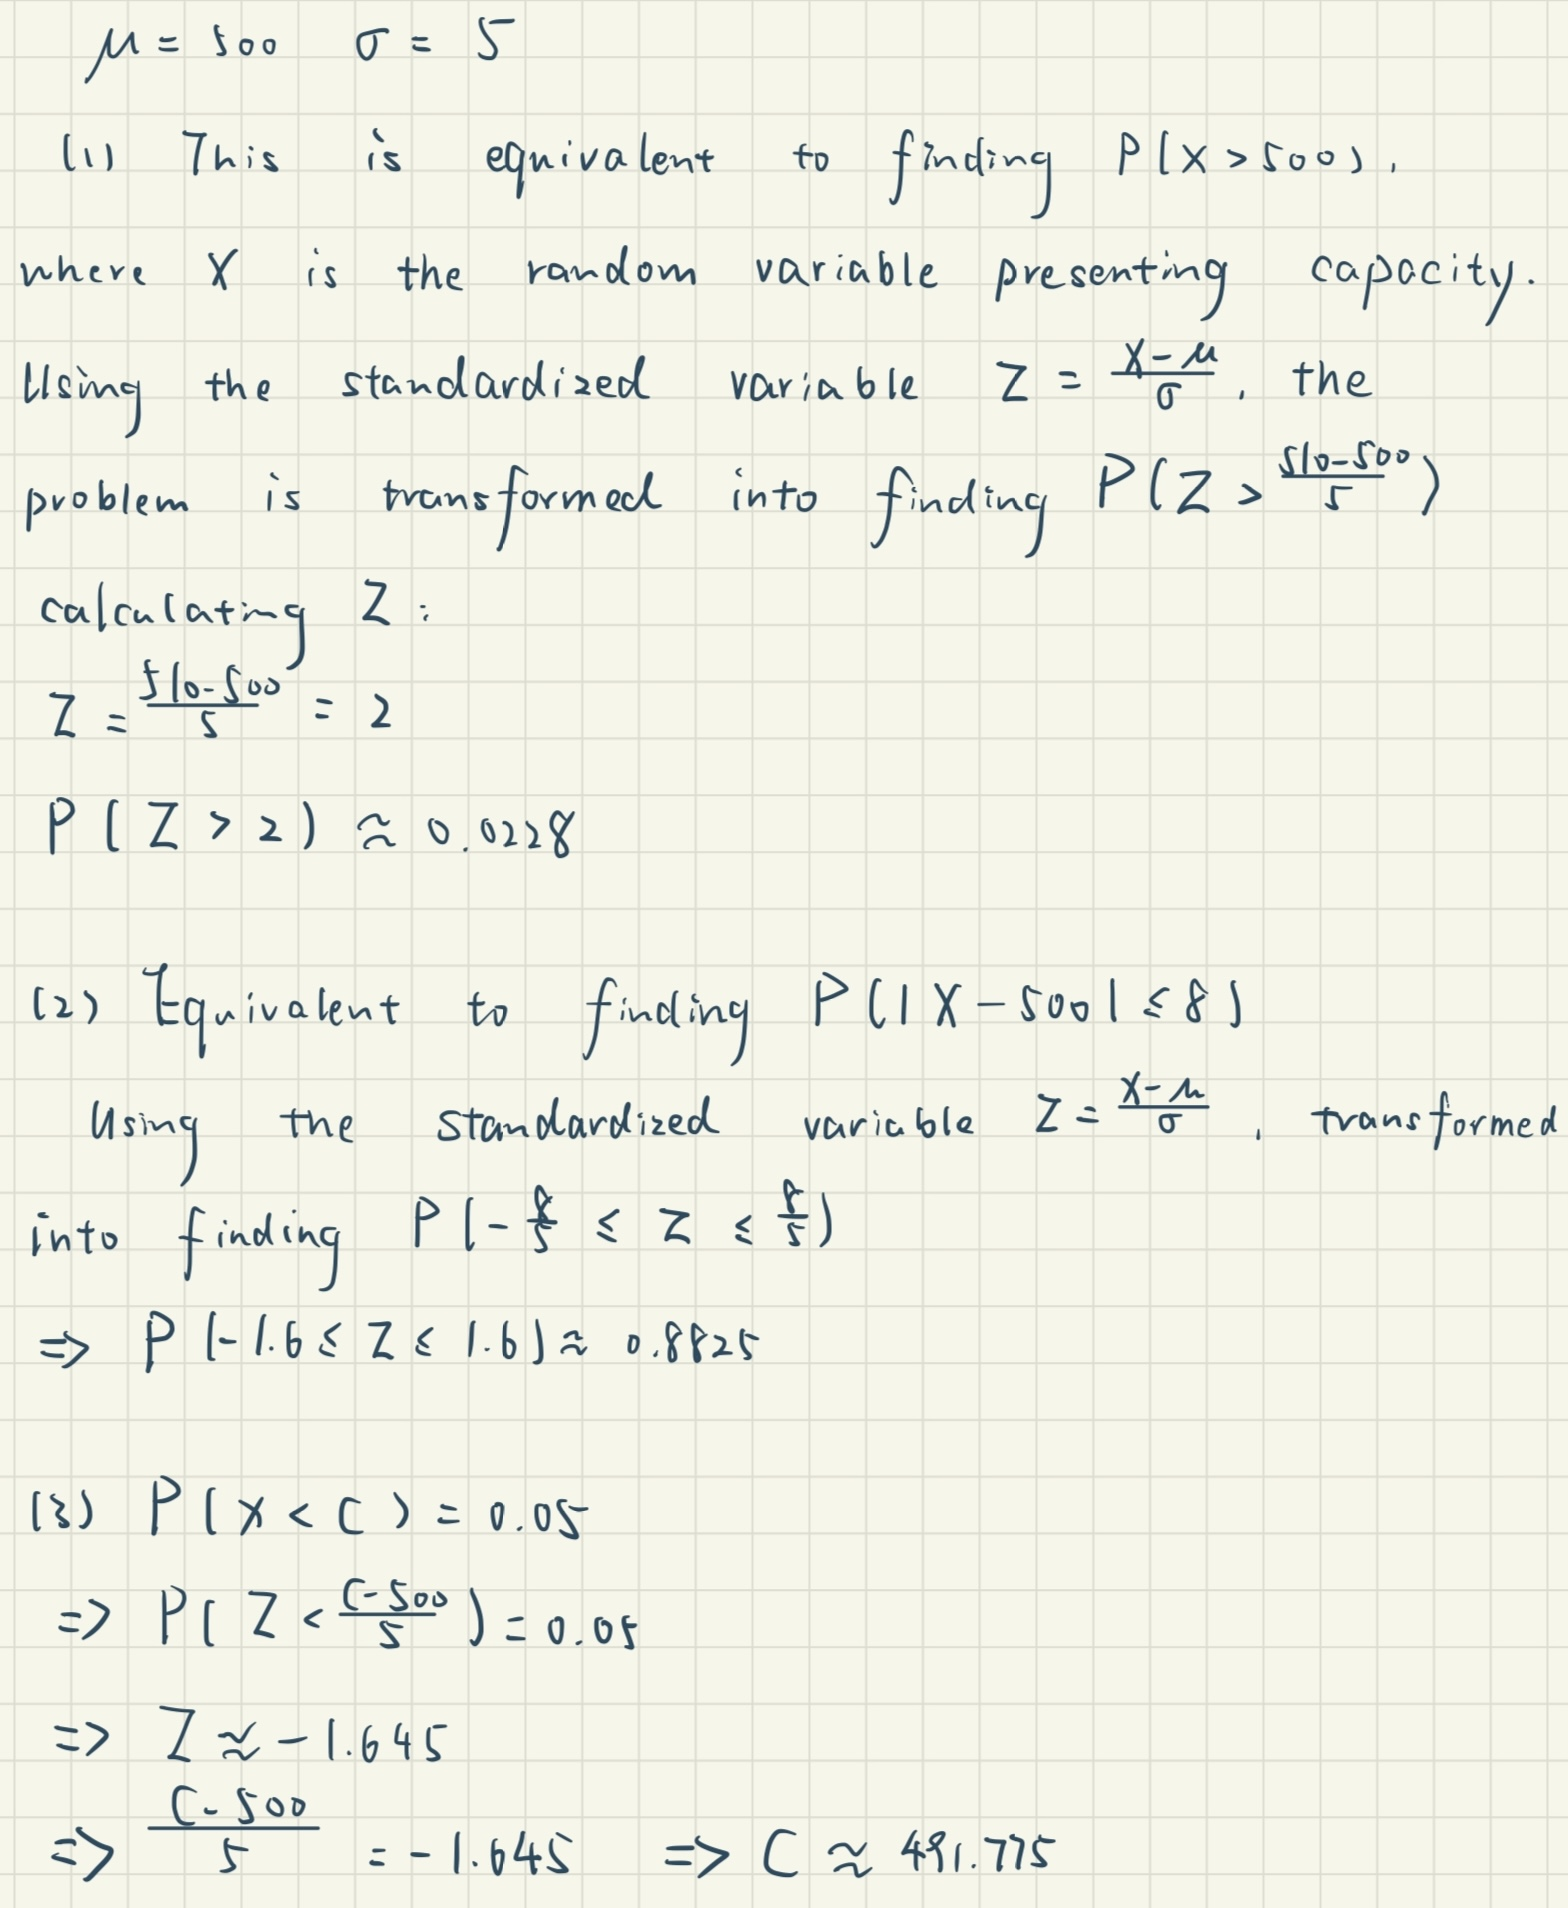

In [ ]:
from scipy.stats import norm
mu = 500
sigma = 5

In [ ]:
prob1 = 1 - norm.cdf(510, mu, sigma)
print(prob1)

0.02275013194817921


In [ ]:
prob2 = norm.cdf(508, mu, sigma) - norm.cdf(492, mu, sigma)
print(prob2)

0.890401416600884


In [ ]:
C = norm.ppf(0.05, mu, sigma)
print(C)

491.7757318652426


### Visualise

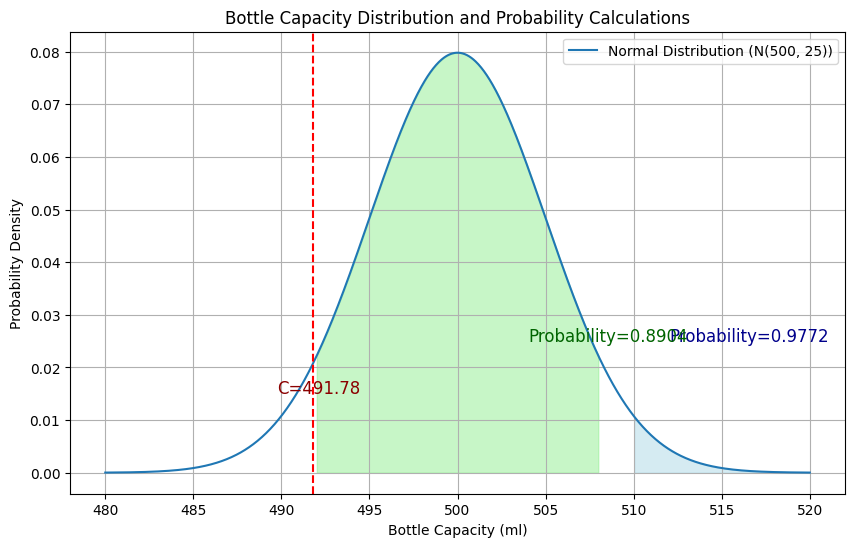

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define the parameters of the normal distribution
mu = 500  # Mean
sigma = 5  # Standard deviation

# Generate the range of x values
x = np.linspace(480, 520, 1000)

# Calculate the probability density function of the normal distribution
pdf = norm.pdf(x, mu, sigma)

# Plot the probability density function
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution (N(500, 25))')

"""
 Probability that the capacity is greater than 510 milliliters
"""
prob1 = 1 - norm.cdf(510, mu, sigma)
plt.fill_between(x, pdf, where=(x > 510), color='lightblue', alpha=0.5)
plt.text(512, 0.025, f'Probability={prob1:.4f}', fontsize=12, color='darkblue')

# Probability that the absolute difference from the standard capacity is within 8 milliliters
prob2 = norm.cdf(508, mu, sigma) - norm.cdf(492, mu, sigma)
plt.fill_between(x, pdf, where=((x > 492) & (x < 508)), color='lightgreen', alpha=0.5)
plt.text(504, 0.025, f'Probability={prob2:.4f}', fontsize=12, color='darkgreen')

# Find the constant C such that the probability that the capacity of each bottle is less than C is 0.05
C = norm.ppf(0.05, mu, sigma)
plt.axvline(x=C, color='red', linestyle='--')
plt.text(C-2, 0.015, f'C={C:.2f}', fontsize=12, color='darkred')

# Add labels and title
plt.xlabel('Bottle Capacity (ml)')
plt.ylabel('Probability Density')
plt.title('Bottle Capacity Distribution and Probability Calculations')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
# import dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

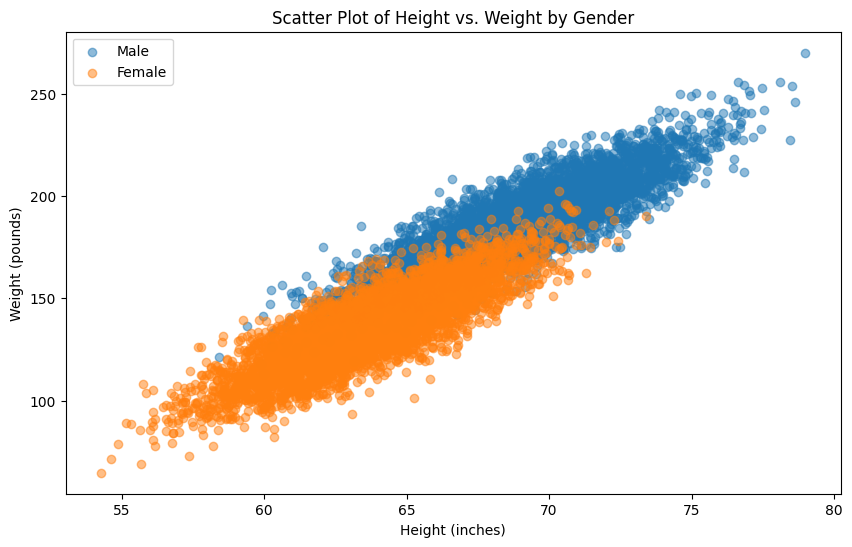

In [ ]:
# Separation of male and female data
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Scatterplotting
plt.figure(figsize=(10, 6))
plt.scatter(male_data['Height'], male_data['Weight'], label='Male', alpha=0.5)
plt.scatter(female_data['Height'], female_data['Weight'], label='Female', alpha=0.5)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Scatter Plot of Height vs. Weight by Gender')
plt.show()


###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
# Divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create and train GaussianNB models
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions using test data
y_test_pred = model.predict(X_test)

# Calculating the accuracy of test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 88.64%


### Plot the random samples

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


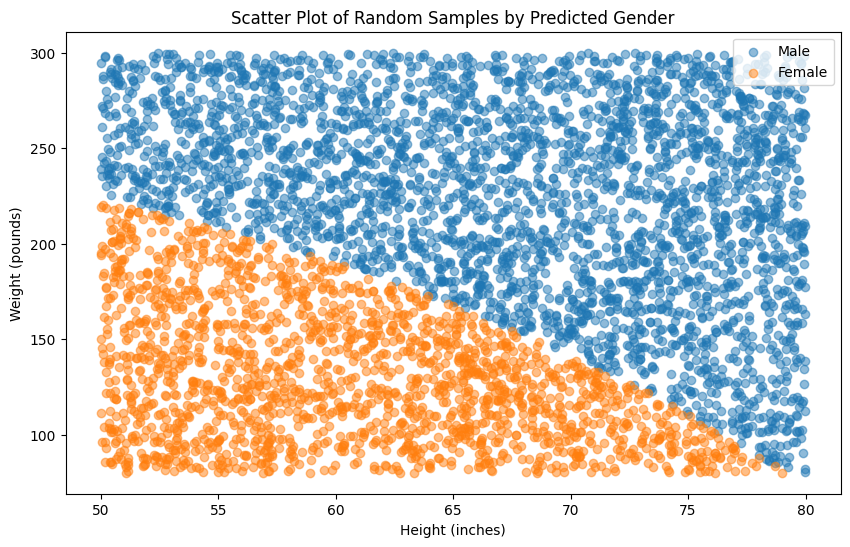

In [ ]:
# Creating Random Sample
random_samples = []
for _ in range(5000):
    height = random.uniform(50, 80)  # 合理的身高范围（以英寸为单位）
    weight = random.uniform(80, 300)  # 合理的体重范围（以磅为单位）
    random_samples.append([height, weight])

# Converting random samples to NumPy arrays
random_samples = np.array(random_samples)

# Classification using models
predicted_labels = model.predict(random_samples)

# Plotting scatterplots of random samples
plt.figure(figsize=(10, 6))
plt.scatter(random_samples[predicted_labels == 'Male'][:, 0], random_samples[predicted_labels == 'Male'][:, 1], label='Male', alpha=0.5)
plt.scatter(random_samples[predicted_labels == 'Female'][:, 0], random_samples[predicted_labels == 'Female'][:, 1], label='Female', alpha=0.5)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Scatter Plot of Random Samples by Predicted Gender')
plt.show()


# Task 4: Applications of Reinforcement Learning

Reinforcement learning is a way of machine learning, and supervised learning, unsupervised learning are different. Reinforcement learning does not need to train the data label, but it needs every step of the action to give the feedback, whether it is rewarded or punished, and based on the feedback to constantly adjust the behaviour of the training object. It is not a classification task, not a financial anti-fraud scenario in how to distinguish between fraudulent customers and normal customers. Reinforcement learning is mainly to guide the training object how to make decisions at each step, and what kind of action can be used to complete a specific purpose or maximise the benefits. In reinforcement learning, we use the reward and punishment mechanism to train agents. Agents will be rewarded for correct behaviour and punished for wrong behaviour. In this way, the agent will try to minimise its wrong behaviours and maximise its right behaviours.   
     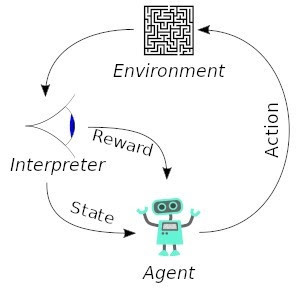

I saw this video on Youtube, (https://www.youtube.com/watch?v=L_4BPjLBF4E&t=448s) which is a very interesting video. In this video, an AI named Albert learnt how to walk to escape from 5 rooms created by the author from zero. The AI was trained using Deep Reinforcement Learning, which is a machine learning method, and it also involves rewarding the agent for doing something correctly and punishing it for doing something wrong.Albert's behaviour is controlled by a neural network that is updated after each attempt to give Albert more rewards and less punishment over time.  

RL has advantages in discrete spaces. For example, AlphaGo is a reinforcement learning training object, and every move AlphaGo makes is not right or wrong, but it's 'good' or 'bad'. Reinforcement learning is trained on the idea that AlphaGo's action gives explicit feedback on every move (https://blog.csdn.net/oXiLang/article/details/123372158?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522169549555716800180665452%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=169549555716800180665452&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-123372158-null-null.142^v94^insert_down1&utm_term=%E5%BC%BA%E5%8C%96%E5%AD%A6%E4%B9%A0alphago&spm=1018.2226.3001.4187). Is it "good" or "bad"? The exact amount of "good" and "bad" can be quantified. Reinforcement learning in the AlphaGo scenario is ultimately trained to allow the pieces to occupy more areas of the board and win the final game.  
  
Why choose Reinforcement Learning? In some tasks, corresponding to an output, we do not know what the best output is. For example, in Go, after the opponent makes a move, I'm afraid the best players don't know where the best move is. In supervised learning, a large amount of label is needed to guide the model, but it's very difficult to obtain accurate labels in Go. Whereas unsupervised learning is usually used to discover patterns or structures in data rather than optimising for a specific goal, in Go patterns and structures are difficult to extract explicitly from the raw data. Of course, we can make a machine learn many chess games through supervised learning methods, which can also make the machine called a master, but the highest level will never exceed the human. If we want the machine to learn to acquire moves beyond the human chess game, and to be able to make one of the best moves when playing against a human in order to beat the highest human player, then reinforcement learning will have to be used. The goal of AlphaGo is to win the game rather than simply predicting the right move for a player to make, which requires a well-defined reward signal (to win or to lose) in order to assess how good each move is so that it can be update the strategy for better results. Reinforcement learning is also able to handle temporal tasks because each step in the game affects subsequent states and rewards. This is an important advantage of reinforcement learning.